In [1]:
import sys

In [2]:
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [3]:
if sys.platform == 'darwin' :
    print(" Mac OS")
else :
    print(" Windows ")

 Mac OS


# 은행 파산 데이터를 가지고 처리하기

##  기본 세팅 정보

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
from matplotlib import font_manager, rc
import sys

if sys.platform == 'darwin' :
    rc('font', family='AppleGothic')

    plt.rcParams['axes.unicode_minus'] = False
else :
    
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

# 1. HTML 파일에서 직접 읽어오기

### url 주소를 주고 데이터를 읽어옴

In [8]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'

In [9]:
dfs = pd.read_html(url)

### html에서 가져온 데이터는 리스트

In [10]:
type(dfs)

list

### 리스트 내부에 데이터프레임이 들어가 있음

In [11]:
dfs_ = dfs[0]

### 파일을 저장하기

In [12]:
dfs_.to_csv("./data/banklist_html.csv")

## 파일을 읽으면서 날짜 열에 대한 파싱

In [13]:
df = pd.read_csv("./data/banklist.csv", parse_dates=['Closing Date', 'Updated Date'])

In [14]:
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2019-02-01
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2019-01-29
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2018-03-22
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2019-01-29


## 파산연도 열 추가

        dt 속성을 이용해서 년도에 대한 포맷팅 하기

In [15]:
df['year'] = df['Closing Date'].dt.strftime('%Y')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 8 columns):
Bank Name                546 non-null object
City                     546 non-null object
ST                       546 non-null object
CERT                     546 non-null int64
Acquiring Institution    546 non-null object
Closing Date             546 non-null datetime64[ns]
Updated Date             546 non-null datetime64[ns]
year                     546 non-null object
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 34.2+ KB


In [17]:
df['year'].dtype

dtype('O')

In [18]:
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2019-02-01,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2019-01-29,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2018-03-22,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2019-01-29,2017


### 문자열은 숫자값이 아니라서 히스토그램을 그릴 수 없음

In [19]:
try :
    df.plot(y='year',kind='hist')
except Exception as e :
    print(e)

Empty 'DataFrame': no numeric data to plot


## 날짜를 정수로 변경

In [20]:
df['year'] = df['year'].astype('int')

In [21]:
df['year'].dtype

dtype('int64')

## 파산이 집중된 년도 확인

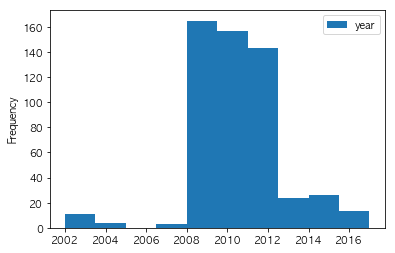

In [22]:
df.plot(y='year',kind='hist')

## 밀집도 그래프 그리기

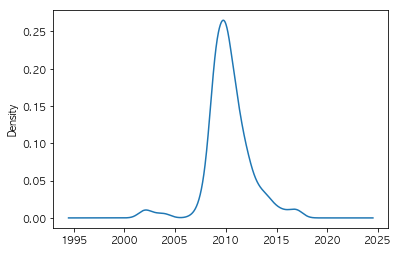

In [23]:
df['year'].plot.kde()

In [24]:
df.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2019-02-01,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2019-01-29,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2018-03-22,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2019-01-29,2017


## 파이 그래프를 그리기

In [25]:
help(df.plot.pie)

Help on method pie in module pandas.plotting._core:

pie(y=None, **kwds) method of pandas.plotting._core.FramePlotMethods instance
    Generate a pie plot.
    
    A pie plot is a proportional representation of the numerical data in a
    column. This function wraps :meth:`matplotlib.pyplot.pie` for the
    specified column. If no column reference is passed and
    ``subplots=True`` a pie plot is drawn for each numerical column
    independently.
    
    Parameters
    ----------
    y : int or label, optional
        Label or position of the column to plot.
        If not provided, ``subplots=True`` argument must be passed.
    **kwds
        Keyword arguments to pass on to :meth:`pandas.DataFrame.plot`.
    
    Returns
    -------
    axes : matplotlib.axes.Axes or np.ndarray of them.
        A NumPy array is returned when `subplots` is True.
    
    See Also
    --------
    Series.plot.pie : Generate a pie plot for a Series.
    DataFrame.plot : Make plots of a DataFrame.
    


### 특정 연도별로 파산된 정보를 확인하기

#### 데이터프레임으로 변환해서 파이 그래프 그리기

In [26]:
df_f = df['year'].value_counts().to_frame()

In [27]:
df_f.head()

,year
2010,157
2009,140
2011,92
2012,51
2008,25


### 파이그래프를 그리면 범례가 그래프와 겹친다

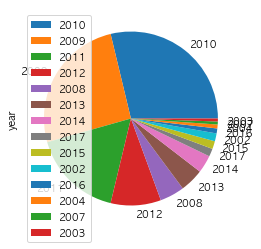

In [28]:
df_f.plot.pie(y='year')

#### 범례 위치를 그래프와 분리하기

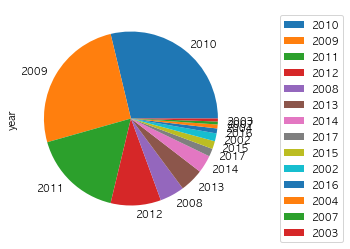

In [29]:
df_f.plot.pie(y='year')

plt.legend(bbox_to_anchor=(1.5, 1))

### 변수는 숫자형으로 처리가 되어야 함

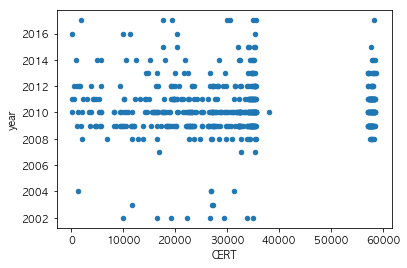

In [30]:
df.plot.scatter(x='CERT',y='year')

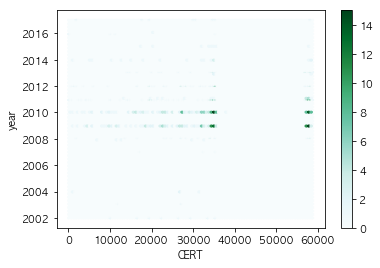

In [31]:
fig, ax = plt.subplots()
df.plot.hexbin(x='CERT',y='year', ax=ax)

# 2. 파일을 다시 읽기 

In [32]:
df_d = pd.read_csv("./data/banklist.csv")

In [33]:
df_d.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,1-Feb-19
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,29-Jan-19
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,22-Mar-18
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,29-Jan-19


## 내부 파일의 열에 대한 정보를 확인하기

In [34]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 7 columns):
Bank Name                546 non-null object
City                     546 non-null object
ST                       546 non-null object
CERT                     546 non-null int64
Acquiring Institution    546 non-null object
Closing Date             546 non-null object
Updated Date             546 non-null object
dtypes: int64(1), object(6)
memory usage: 29.9+ KB


##  문자열인 날짜 열을 날짜 자료형으로  변경하기 

#### 문자열을 to_datetime  함수로 날짜 변경하기 

In [35]:
df_d['Closing Date'] = pd.to_datetime(df_d['Closing Date'])

In [36]:
df_d['Updated Date'] = pd.to_datetime(df_d['Updated Date'])

In [37]:
df_d.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2019-02-01
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2019-01-29
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2018-03-22
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2019-01-29


In [38]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 7 columns):
Bank Name                546 non-null object
City                     546 non-null object
ST                       546 non-null object
CERT                     546 non-null int64
Acquiring Institution    546 non-null object
Closing Date             546 non-null datetime64[ns]
Updated Date             546 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 29.9+ KB


### 특정 열의 자료형으로 읽기

In [39]:
df_date = df_d.select_dtypes(include=['datetime'])

In [40]:
df_date.head()

,Closing Date,Updated Date
0,2017-12-15,2019-02-01
1,2017-10-13,2018-02-21
2,2017-05-26,2019-01-29
3,2017-05-05,2018-03-22
4,2017-04-28,2019-01-29


### 숫자 타입을 가져오기

In [41]:
df_num = df_d.select_dtypes(include=['number'])

In [42]:
df_num.head()

,CERT
0,30570
1,17719
2,1802
3,30003
4,58302


# 3. 날짜를 비교해서 데이터 추출하기 

## 날짜를 비교하기 위해 날짜 생성하기

     정수로 입력해서 처리

In [43]:
import datetime

In [44]:
datetime.datetime(2017,8,31)

datetime.datetime(2017, 8, 31, 0, 0)

### 논리식 검색을 위해서는 and, or 대신 &, | 를 사용

In [45]:
((datetime.datetime(2017,8,31)<= df_date['Closing Date'] ) &  (df_date['Closing Date'] <= datetime.datetime(2018,8,31))).head()

0     True
1     True
2    False
3    False
4    False
Name: Closing Date, dtype: bool

In [46]:
df_bdate = df_date.loc[ ((datetime.datetime(2017,1,1)<= df_date['Closing Date'] )  &  (df_date['Closing Date'] <= datetime.datetime(2017,12,31))) ]

In [47]:
df_bdate.shape

(8, 2)

In [48]:
df_bdate.head()

,Closing Date,Updated Date
0,2017-12-15,2019-02-01
1,2017-10-13,2018-02-21
2,2017-05-26,2019-01-29
3,2017-05-05,2018-03-22
4,2017-04-28,2019-01-29


In [49]:
df_bdate.tail()

,Closing Date,Updated Date
3,2017-05-05,2018-03-22
4,2017-04-28,2019-01-29
5,2017-03-03,2019-01-29
6,2017-01-27,2019-01-29
7,2017-01-13,2017-05-18


In [50]:
df[ df['year'] == 2017]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2019-02-01,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2018-02-21,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2019-01-29,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2018-03-22,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2019-01-29,2017
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2019-01-29,2017
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2019-01-29,2017
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,2017-01-13,2017-05-18,2017
